This is a project where we need to classify different kinds of monkeys By using opencv and CNN

In [60]:

import matplotlib.pyplot as plt  # plotting library
import scipy                     # scientific computnig and technical computing
import cv2                       # working with, mainly resizing, images
import numpy as np               # dealing with arrays
import glob                      # return a possibly-empty list of path names that match pathname
import os                        # dealing with directories
import pandas as pd              # providing data structures and data analysis tools
import tensorflow as tf       
import itertools
import random
from random import shuffle       # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm            # a nice pretty percentage bar for tasks. Thanks to viewer Daniel Bühler for this suggestion
from PIL import Image
from scipy import ndimage
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
%matplotlib inline
np.random.seed(1)

In [61]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [62]:
train_dir = 'C:\\Users\\shkatta\\Desktop\\AI\\csv files\\training'
test_dir = 'C:\\Users\\shkatta\\Desktop\\AI\\csv files\\validation'

In [63]:
#label info
cols = ['Label','Latin Name', 'Common Name','Train Images', 'Validation Images']
labels = pd.read_csv("C:\\Users\\shkatta\\Desktop\\AI\\csv files\\monkey_labels.txt", names=cols, skiprows=1)
labels


,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [64]:
labels = labels['Common Name']
type(labels)

pandas.core.series.Series

C:\Users\shkatta\Desktop\AI\csv files\training\n0
(367, 550, 3)
C:\Users\shkatta\Desktop\AI\csv files\training\n1
(423, 650, 3)
C:\Users\shkatta\Desktop\AI\csv files\training\n2
(1302, 864, 3)
C:\Users\shkatta\Desktop\AI\csv files\training\n3
(1291, 904, 3)
C:\Users\shkatta\Desktop\AI\csv files\training\n4
(199, 351, 3)
C:\Users\shkatta\Desktop\AI\csv files\training\n5
(599, 798, 3)
C:\Users\shkatta\Desktop\AI\csv files\training\n6
(854, 1300, 3)
C:\Users\shkatta\Desktop\AI\csv files\training\n7
(374, 704, 3)
C:\Users\shkatta\Desktop\AI\csv files\training\n8
(621, 1024, 3)
C:\Users\shkatta\Desktop\AI\csv files\training\n9
(288, 512, 3)


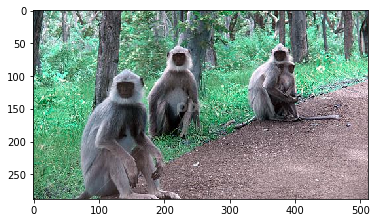

In [50]:
a=os.listdir(train_dir)
for i in a:
    b=os.path.join(train_dir,i)
    print(b)
    c=os.listdir(os.path.join(train_dir,i))
    for j in c:
        d=os.path.join(b,j)
        img=cv2.imread(d)
        print(img.shape)
        
        plt.imshow(img)
        break
    

In [55]:
LR = 1e-3
height=150
width=150
channels=3
seed=1337
batch_size = 64
num_classes = 10
epochs = 20
data_augmentation = True
num_predictions = 20

# Training generator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(height,width),
                                                    batch_size=batch_size,
                                                    seed=seed,
                                                    shuffle=True,
                                                    class_mode='categorical')

# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(height,width), 
                                                  batch_size=batch_size,
                                                  seed=seed,
                                                  shuffle=False,
                                                  class_mode='categorical')

train_num = train_generator.samples
validation_num = validation_generator.samples 

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [52]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [53]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 36, 64)       

In [54]:
filepath=str(os.getcwd()+"\monkey.h5f")
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# = EarlyStopping(monitor='val_acc', patience=15)
callbacks_list = [checkpoint]#, stopper]

In [56]:
history = model.fit_generator(train_generator,
                              steps_per_epoch= train_num // batch_size,
                              epochs=epochs,
                              validation_data=train_generator,
                              validation_steps= validation_num // batch_size,
                              callbacks=callbacks_list, 
                              verbose = 1
                             )

Epoch 1/20
17/17 [==============================] - ETA: 3:34 - loss: 2.3094 - acc: 0.046 - ETA: 1:42 - loss: 2.2605 - acc: 0.081 - ETA: 1:08 - loss: 2.3989 - acc: 0.101 - ETA: 50s - loss: 2.3897 - acc: 0.104 - ETA: 46s - loss: 2.3687 - acc: 0.10 - ETA: 43s - loss: 2.3613 - acc: 0.09 - ETA: 38s - loss: 2.3477 - acc: 0.10 - ETA: 36s - loss: 2.3423 - acc: 0.10 - ETA: 35s - loss: 2.3381 - acc: 0.09 - ETA: 31s - loss: 2.3317 - acc: 0.10 - ETA: 25s - loss: 2.3276 - acc: 0.09 - ETA: 21s - loss: 2.3219 - acc: 0.09 - ETA: 16s - loss: 2.3186 - acc: 0.09 - ETA: 11s - loss: 2.3191 - acc: 0.08 - ETA: 7s - loss: 2.3179 - acc: 0.0883 - ETA: 3s - loss: 2.3167 - acc: 0.085 - 65s 4s/step - loss: 2.3153 - acc: 0.0861 - val_loss: 2.2782 - val_acc: 0.1406

Epoch 00001: val_acc improved from -inf to 0.14062, saving model to C:\Users\shkatta/monkey.h5f
Epoch 2/20
17/17 [==============================] - ETA: 38s - loss: 2.2918 - acc: 0.01 - ETA: 36s - loss: 2.2777 - acc: 0.07 - ETA: 32s - loss: 2.2747 - acc

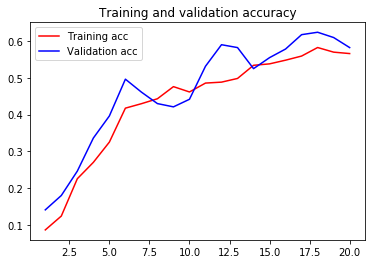

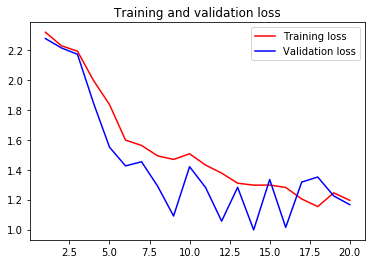

In [57]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [58]:
def plot_confusion_matrix(cm, target_names,title='Confusion matrix',cmap=None,normalize=False):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float32') / cm.sum(axis=1)
        cm = np.round(cm,2)
        

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel("Predicted label\naccuracy={:0.4f}\n misclass={:0.4f}".format(accuracy, misclass))
    plt.show()


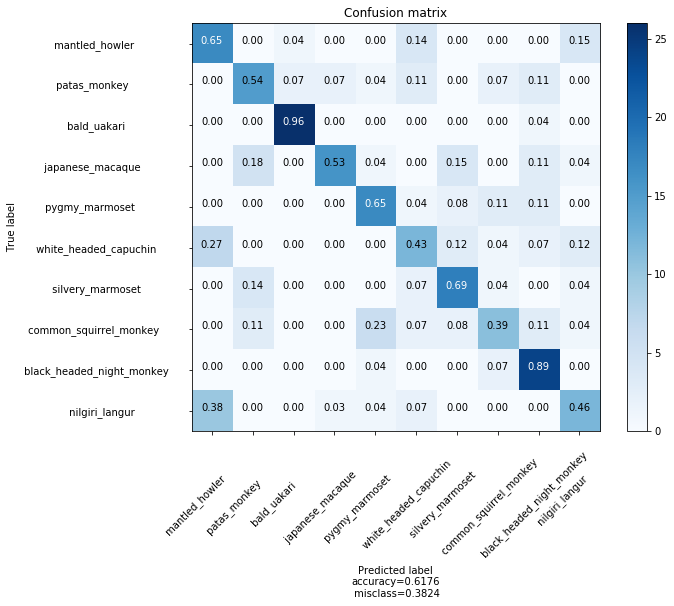

In [59]:
from keras.models import load_model
model_trained = load_model(filepath)
# Predict the values from the validation dataset
Y_pred = model_trained.predict_generator(validation_generator, validation_num // batch_size+1)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
#Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true = validation_generator.classes,y_pred = Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, normalize=True, target_names=labels)